## Project:- Stroke Price Prediction

A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.

A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.

importing libraries

In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

loading data!!!

In [162]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [163]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [164]:
df.shape

(5110, 12)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Data Cleaning 

In [166]:
df.drop('id',axis=1,inplace=True)

In [167]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### any missing values??

In [168]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [169]:
# fill na

In [170]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [171]:
df.isnull().sum()['bmi']

0

### Feature Engineering

Now deal with categorcal data 

1.hypertension

2.heart_disease

3.ever_married

4.work_type

5.Residence_type

6.smoking_status

7.Gender

##### 1.hypertension

In [172]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [173]:
print(df['hypertension'].dtype)

int64


##### 2.heart_disease

In [174]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [175]:
print(df['heart_disease'].dtype)

int64


##### 3.ever_married

In [176]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [177]:
def married(ever_married):
    if ever_married == 'Yes':
        return 1
    else:
        return 0

In [178]:
df['ever_married']=df['ever_married'].apply(married)

In [179]:
df['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

##### 4.work_type

In [180]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [181]:
def work_type(work):
    if work == 'Private':
        return 4
    if work =='Self-employed':
        return 3
    if work =='children':
        return 2
    if work == 'Govt_job':
        return 1
    if work == 'Never_worked':
        return 0

In [182]:
df['work_type']= df['work_type'].apply(work_type)

In [183]:
df.work_type.value_counts()

4    2925
3     819
2     687
1     657
0      22
Name: work_type, dtype: int64

##### 5.Residence_type

In [184]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [185]:
def residence_type(residence):
    if residence=='Urban':
        return 1
    else:
        return 0
    Residence_type
df['Residence_type']=df['Residence_type'].apply(residence_type)

In [186]:
df.Residence_type.value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

##### 6.smoking_status

In [187]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [188]:
def smoking_status(smoking):
    if smoking=='never smoked':
        return 0
    if smoking=='Unknown':
        return 
        
        

In [189]:
df['gender'] = pd.Categorical(df['gender'])
dfDummies_gender = pd.get_dummies(df['gender'], prefix = 'gender_encoded')
dfDummies_gender

,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [190]:
df = pd.concat([df, dfDummies_smoking_status], axis=1)

##### 7.Gender

In [191]:
df['gender'].value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [193]:
def gender(gender):
    if gender=='Male':
        return 1
    else:
        return 0

In [194]:
df['gender']=df['gender'].apply(gender)
df['gender'].value_counts()

0    2995
1    2115
Name: gender, dtype: int64

### Data Visualization

##### 1.Avg Glucose level

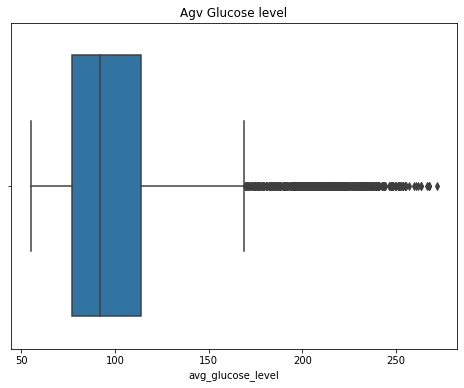

In [195]:
plt.figure(figsize=(8,6))
plt.title('Agv Glucose level')
sns.boxplot(x='avg_glucose_level',data=df)
plt.show()

##### 2.Age

<AxesSubplot:xlabel='age', ylabel='Count'>

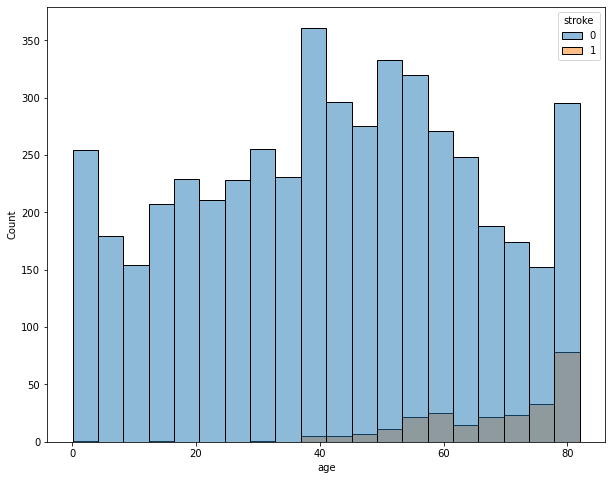

In [196]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='age',hue='stroke')

##### 3.heart_disease

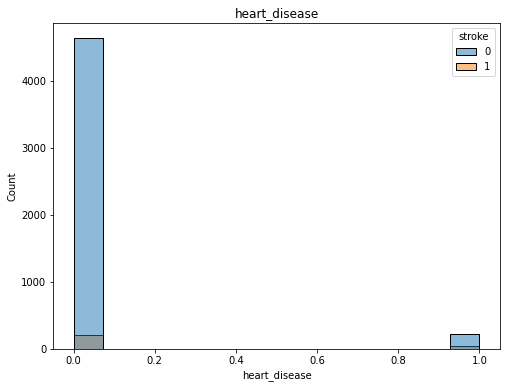

In [197]:
plt.figure(figsize=(8,6))
plt.title('heart_disease')
sns.histplot(x='heart_disease',data=df,hue='stroke')
plt.show()

##### 3.Hypertension

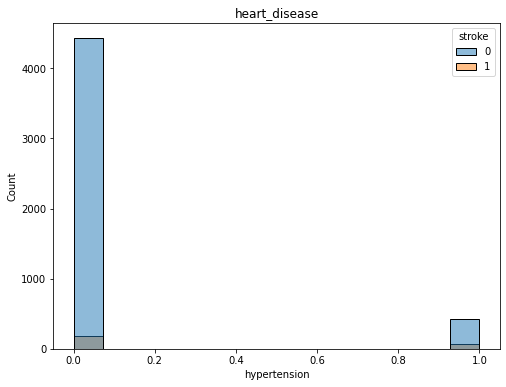

In [198]:
plt.figure(figsize=(8,6))
plt.title('heart_disease')
sns.histplot(x='hypertension',data=df,hue='stroke')
plt.show()

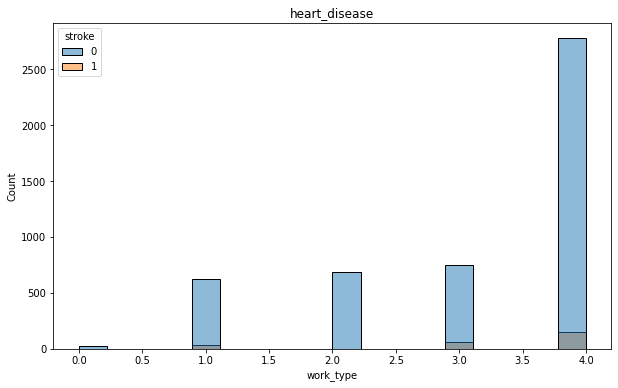

In [199]:
plt.figure(figsize=(10,6))
plt.title('heart_disease')
sns.histplot(x='work_type',data=df,hue='stroke')
plt.show()

Which Factor affecting most on Stroke

In [200]:
df.corr()['stroke'].sort_values(ascending=False)

stroke                                    1.000000
age                                       0.245257
heart_disease                             0.134914
avg_glucose_level                         0.131945
hypertension                              0.127904
ever_married                              0.108340
smoking_status_encoded_formerly smoked    0.064556
bmi                                       0.038947
work_type                                 0.032098
Residence_type                            0.015458
gender                                    0.009117
smoking_status_encoded_smokes             0.008939
smoking_status_encoded_never smoked      -0.004129
smoking_status_encoded_Unknown           -0.055892
Name: stroke, dtype: float64

<AxesSubplot:>

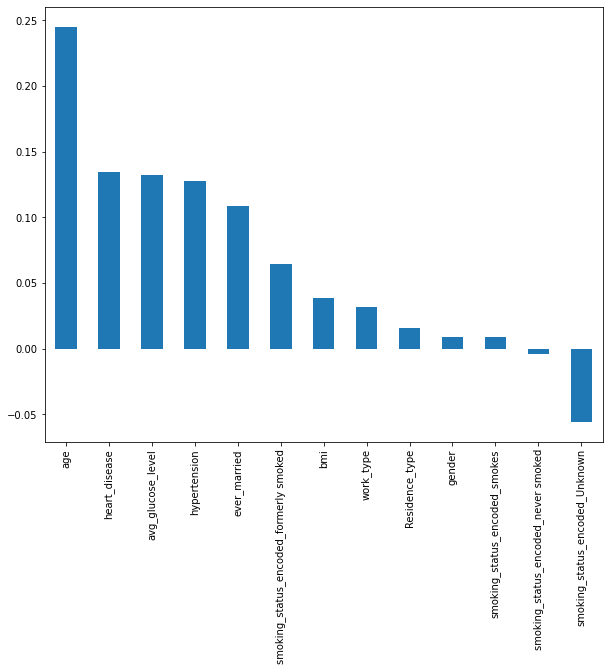

In [201]:
plt.figure(figsize=(10,8))
df.corr()['stroke'].sort_values(ascending=False)[1:].plot(kind='bar')

#### correlation heatmap

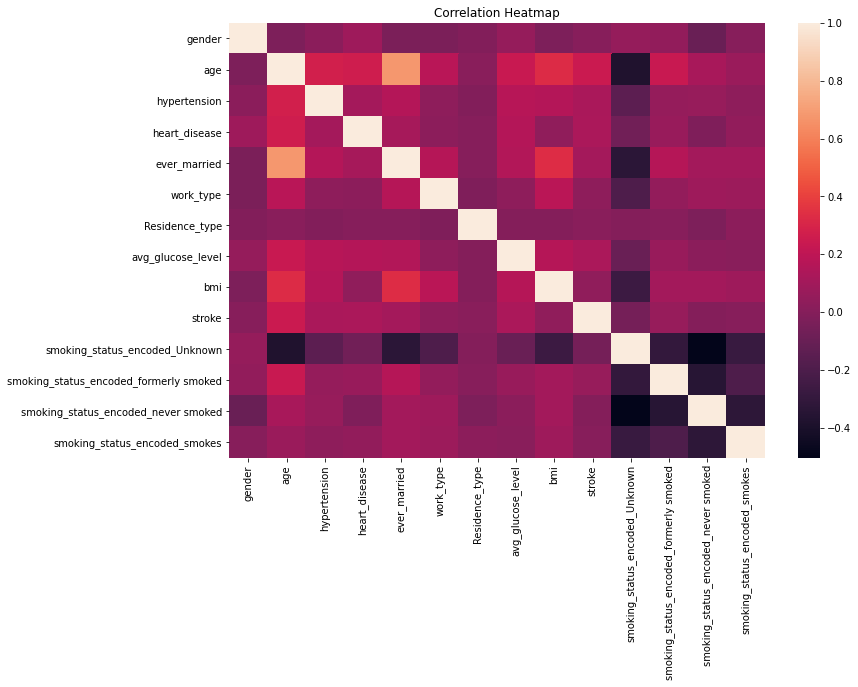

In [202]:
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr())
plt.show()

In [203]:
df.drop('smoking_status',axis=1,inplace=True)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  5110 non-null   int64  
 1   age                                     5110 non-null   float64
 2   hypertension                            5110 non-null   int64  
 3   heart_disease                           5110 non-null   int64  
 4   ever_married                            5110 non-null   int64  
 5   work_type                               5110 non-null   int64  
 6   Residence_type                          5110 non-null   int64  
 7   avg_glucose_level                       5110 non-null   float64
 8   bmi                                     5110 non-null   float64
 9   stroke                                  5110 non-null   int64  
 10  smoking_status_encoded_Unknown          5110 non-null   uint

In [250]:
X=df.drop('stroke',axis=1)

In [251]:
y=df['stroke']

### Train Test Split

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [254]:
X_train.shape,y_train.shape

((3423, 13), (3423,))

In [255]:
X_test.shape, y_test.shape

((1687, 13), (1687,))

### Model Building

In [256]:
lr=LogisticRegression()

In [257]:
lr.fit(X_train,y_train)

LogisticRegression()

In [258]:
y_pred=lr.predict(X_test)

#### model Evaluations

In [259]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687



acccuracy for 1 is not well bcoz our data is unbalanced

In [261]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### Handle imbalanced data

In [262]:
df_class_1=df[df['stroke']==1]
df_class_0=df[df['stroke']==0]

#### OverSampling Method

In [263]:
df_class_1_over = df_class_1.sample(4861, replace=True)

In [264]:
df_class_1_over.shape

(4861, 14)

In [265]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.stroke.value_counts())

Random over-sampling:
0    4861
1    4861
Name: stroke, dtype: int64


In [266]:
# df_test_over

spliting data into training and testing set

In [267]:
X = df_test_over.drop('stroke',axis='columns')
y = df_test_over['stroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

#### model building and model Evaluation

#### LogisticRegression

In [268]:
lr.fit(X_train,y_train)


LogisticRegression()

In [269]:
predictions=lr.predict(X_test)

In [270]:
predictions

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [271]:
# y_test

In [272]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       973
           1       0.77      0.83      0.80       972

    accuracy                           0.79      1945
   macro avg       0.79      0.79      0.79      1945
weighted avg       0.79      0.79      0.79      1945



#### RandomForestClassifier

In [287]:
model = RandomForestClassifier()

In [288]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [289]:
predictions=model.predict(X_test)

In [290]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       973
           1       0.99      1.00      0.99       972

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



#### predictions

In [313]:
X_train.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
134,0,68.0,1,0,1,3,0,206.09,26.7,0,0,1,0


In [314]:
def rfc_model(data):
    pred=model.predict(data)[0]
    if pred==1:
        return 'Stroke Occure'
    else:
        return 'Stroke not occure'

rfc_model([[1,67.0,0,1,1,4,1,228.33,36.7,0,1,0,0]])
    
 

'Stroke Occure'

In [320]:
y_train[:1]

134    1
Name: stroke, dtype: int64

## Thank You!!!